## Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def squared_norm(x):
    x_val = np.float64(x[0][0])
    y_val = np.float64(x[1][0])
    return x_val*x_val + y_val*y_val

def norm(x):
    return np.sqrt(squared_norm(x))

def get_unit_vector(x):
    norm_value = norm(x)
    if norm_value == np.float64(0.0):
        return x
    return (x/norm_value).copy()

In [3]:
def f1(x,y):
    vec = np.array([[x],[y]])
    A = np.array([[1,0],[0,1]])
    h = np.matmul(vec.T,A)
    return 0.5*np.matmul(h,vec)

def f2(x,y):
    vec = np.array([[x],[y]])
    A = np.array([[10,8],[8,10]])
    h = np.matmul(vec.T,A)
    return 0.5*np.matmul(h,vec)
    
def gradient_f1(x):
    x_value = np.float64(x[0][0])
    y_value = np.float64(x[1][0])
    return np.array([[x_value],[y_value]])

def gradient_f2(x):
    x_value = np.float64(x[0][0])
    y_value = np.float64(x[1][0])
    return np.array([[10*x_value + 8 *y_value],[10*y_value + 8 * x_value]])

def hessian_f1(x):
    return np.array([[1,0],[0,1]])

def hessian_f2(x):
    return np.array([[10,8],[8,10]])



In [12]:
def steepest_descent(initial_point,function='f1'):

    #initial_point = np.array([[2.0],[0.0]],dtype=np.float64)
    fun = f1 if function == 'f1' else f2
    gradient_fun = gradient_f1 if function == 'f1' else gradient_f2

    current_point = initial_point.copy()
    
    c = 0.0001
    rho = 0.9
    iterations = 0
    iterates = []

    iterates.append(current_point)

    while True:        
        
        iterations += 1
        gradient = gradient_fun(current_point)
        p = -get_unit_vector(gradient)            
        alpha  = np.float64(1.0)
        previous_point = current_point.copy() 
        break_inner_loop = False
    
        current_x = np.float64(current_point[0][0])
        current_y = np.float64(current_point[1][0])

        current_function_value = np.float64(fun(current_x,current_y).squeeze()) 
        while not break_inner_loop:
            
            new_point = current_point + alpha*p

            new_x = np.float64(new_point[0][0])
            new_y = np.float64(new_point[1][0])

            new_function_value = np.float64(fun(new_x,new_y).squeeze())
            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())

            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True
     

        new_point = current_point + alpha*p
        current_point = new_point.copy()
        iterates.append(current_point)
        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    return iterations,iterates


In [13]:
initial_point = np.array([[2.0],[2.0]],dtype=np.float64)
iterations , iterates = steepest_descent(initial_point=initial_point,function='f2')

In [6]:
def newtons_method(initial_point,function = 'f1'):

    fun = f1 if function == 'f1' else f2
    gradient_fun = gradient_f1 if function == 'f1' else gradient_f2
    hessian_fun = hessian_f1 if function =='f1' else hessian_f2
    current_point = initial_point.copy()
    
    iterations = 0
    iterates = []
    iterates.append(current_point)
    c = 0.0001
    rho = 0.9

    while True:        
        iterations+=1
        gradient = gradient_fun(current_point)
        hessian = hessian_fun(current_point)
        m = np.matmul(np.linalg.inv(hessian),gradient)
        p = -m
        
        break_inner_loop = False
        alpha  = np.float64(1.0)


        
        
        current_x = np.float64(current_point[0][0])
        current_y = np.float64(current_point[1][0])

        current_function_value = np.float64(fun(current_x,current_y).squeeze()) 
        
        while not break_inner_loop:
            new_point = current_point + alpha*p
            new_x = np.float64(new_point[0][0])
            new_y = np.float64(new_point[1][0])

            new_function_value = np.float64(fun(new_x,new_y).squeeze())

            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())
            second_order_term = (c*(alpha*alpha/2)*(np.matmul(np.matmul(p.T,hessian),p))).squeeze()
            increment_value += np.float64(second_order_term)
            
            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True
      
        
        previous_point = current_point.copy() 
        new_point = current_point + alpha*p
        current_point = new_point.copy()
        iterates.append(current_point)
        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    
    return iterations,iterates

In [7]:
initial_point = np.array([[2.0],[0.0]],dtype=np.float64)
iterations , iterates = newtons_method(initial_point=initial_point,function='f2')

[array([[2.],
       [2.]]), array([[1.29289322],
       [1.29289322]]), array([[0.58578644],
       [0.58578644]]), array([[-0.12132034],
       [-0.12132034]]), array([[0.10057726],
       [0.10057726]]), array([[-0.09913058],
       [-0.09913058]]), array([[0.08060647],
       [0.08060647]]), array([[-0.06498054],
       [-0.06498054]]), array([[0.05294494],
       [0.05294494]]), array([[-0.0425747],
       [-0.0425747]]), array([[0.03479621],
       [0.03479621]]), array([[-0.02787423],
       [-0.02787423]]), array([[0.02288883],
       [0.02288883]]), array([[-0.02279792],
       [-0.02279792]]), array([[0.01832015],
       [0.01832015]]), array([[-0.01498549],
       [-0.01498549]]), array([[0.01199208],
       [0.01199208]]), array([[-0.00985975],
       [-0.00985975]]), array([[0.0098069],
       [0.0098069]]), array([[-0.00789309],
       [-0.00789309]]), array([[0.0064439],
       [0.0064439]]), array([[-0.00516906],
       [-0.00516906]]), array([[0.00423744],
       [0.00

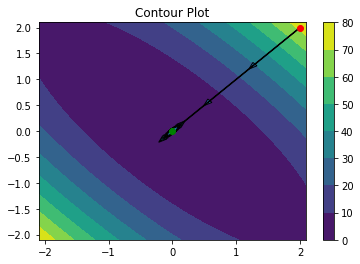

In [14]:






def plot(function,iterations,iterates):
    
    if function == 'f1':
        fun = f1
    else:
        fun = f2

    res = 1000
    x_values = np.linspace(2.1,-2.1,res)
    y_values = np.linspace(2.1,-2.1,res)
    
    X,Y = np.meshgrid(x_values,y_values)

    Z = np.zeros((res,res))
    for i in range(len(X[0])):
        for j in range(len(Y[:,0])):
            z_value = fun(X[0,i],Y[j,0])
            Z[i][j] = z_value
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp) 
    ax.set_title('Contour Plot')
    plt.plot(iterates[0][0,0],iterates[0][1,0],'ro')
    for i in range(1,len(iterates)):
        plt.arrow(iterates[i-1][0,0],iterates[i-1][1,0],dx = iterates[i][0,0] - iterates[i-1][0,0] ,dy = iterates[i][1,0] - iterates[i-1][1,0],width=0.01,head_width = 0.09)
    plt.plot(iterates[len(iterates)-1][0,0], iterates[len(iterates)-1][1,0],'go',linewidth=0.1)
    plt.show()
            
    

print(iterates)
    
plot(function='f2',iterates= iterates, iterations =iterations)

(2,
 [array([[2.],
         [2.]]),
  array([[0.],
         [0.]]),
  array([[0.],
         [0.]])])

In [ ]:
initial_point = np.array([[150.0],[20.0]],dtype=np.float64)
newtons_method(initial_point,function='f2')

### Question 3

### Seperator

In [8]:
import pandas as pd

dataframe = pd.read_csv('./data/state_wise_daily.csv')

In [9]:
summed_data = dataframe.sum(axis=1,numeric_only=True)

In [10]:
infected_indices = [3*i for i in range(int(len(summed_data)/3))]
indices = [ 3*i+1 for i in range(int(len(summed_data)/3)) ]
indices =  indices +  [ 3*i+2 for i in range(int(len(summed_data)/3)) ]
indices = sorted(indices)


In [11]:
recovered_deceased = summed_data[indices]
recovered_dup = recovered_deceased.groupby(recovered_deceased.index//3).transform('sum')
rec_indices = [ 3*i + 1 for i in range(int(len(recovered_dup)//2))]
recovered = recovered_dup[rec_indices]
recovered = recovered.reset_index(drop = True)


In [12]:
infected = summed_data[infected_indices]
infected = infected.reset_index(drop=True)

In [13]:
new_dataframe = pd.DataFrame({'infected' :  infected , 'recovered' : recovered})
time_series = new_dataframe.index.array

In [14]:
time_series_df = pd.DataFrame()
time_series_df.insert(0,"time",time_series)

time_series_df["S(t)"] = 0
time_series_df["I(t)"] = 0
time_series_df.insert(3,"R(t)",new_dataframe['recovered'].cumsum())


In [15]:
population = 130 * (10**7)
time_series_df.loc[0,"I(t)"] =  new_dataframe.loc[0,'infected']
time_series_df.loc[0,"S(t)"] =  population - new_dataframe.loc[0,'infected'] - new_dataframe.loc[0,'recovered']

for i in range(1,len(new_dataframe)):
    
    time_series_df.loc[i,"I(t)"] = time_series_df.loc[i-1,"I(t)"] + new_dataframe.loc[i,'infected'] - new_dataframe.loc[i,'recovered']
    time_series_df.loc[i,"S(t)"] = population - time_series_df.loc[i,"I(t)"] - time_series_df.loc[i,"R(t)"]
 

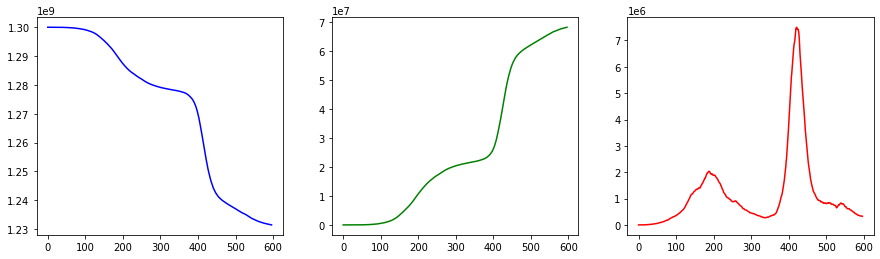

In [16]:

figure,axes = plt.subplots(1,3)
figure.set_figwidth(15)

axes[0].plot(time_series_df['time'],time_series_df['S(t)'] ,color='b', label = 'S(t)')
axes[1].plot(time_series_df['time'],time_series_df['R(t)'] ,color='g', label = 'R(t)')
axes[2].plot(time_series_df['time'],time_series_df['I(t)'] ,color='r', label = 'I(t)')
plt.show()

In [44]:
population

1300000000